In [1]:
# this cell enables relative path imports
import os
from dotenv import load_dotenv
load_dotenv()
_PROJECT_PATH: str = os.environ["_project_path"]
_PICKLED_DATA_FILENAME: str = os.environ["_pickled_data_filename"]

import sys
from pathlib import Path
project_path = Path(_PROJECT_PATH)
sys.path.append(str(project_path))

In [2]:
# import all your modules here
import json
import pandas as pd

import config_v2 as cfg
from library_ubidots_v2 import Ubidots as ubi

In [3]:
# set your constants here
baseline=cfg.BASELINE
study=cfg.STUDY

In [4]:
df_devices = ubi.get_available_devices_v2(label='bancolombia', level='group', page_size=1000)
df_vars = ubi.get_available_variables(list(df_devices['device_id']))

In [5]:
df_vars = df_vars[df_vars['variable_label'].isin(cfg.WHITELISTED_VAR_LABELS)]
VAR_IDS_TO_REQUEST = list(df_vars['variable_id'])
VAR_ID_TO_LABEL = dict(zip(df_vars['variable_id'], df_vars['variable_label']))

In [6]:
SUBSET_SIZE = 45
DATE_INTERVALS_REQUEST = [
    [baseline[0], baseline[1]],
    [study[0], study[1]]
]

df = ubi.get_data_robust(VAR_IDS_TO_REQUEST, DATE_INTERVALS_REQUEST, SUBSET_SIZE)

Progress: 15.3%
Progress: 30.3%
Progress: 45.3%
Progress: 60.3%
Progress: 75.3%
Progress: 90.3%
Progress: 100.0%


In [7]:
pd.to_pickle(df, project_path / 'data'/ _PICKLED_DATA_FILENAME)

In [8]:
# df_coords = Report.get_coords_dataframe(list(df_devices['id']))
# pd.to_pickle(df_coords, "data_coordinates.pkl")

<AxesSubplot:xlabel='datetime'>

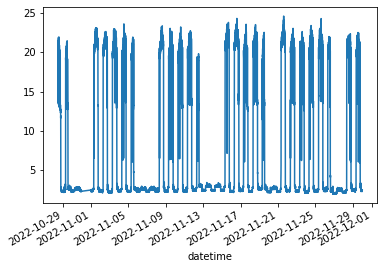

In [18]:
# df = pd.read_pickle(project_path / 'data'/ _PICKLED_DATA_FILENAME)

# df_cc_unico = df.query("device_name == 'BC 514 - Centro Comercial Único'")

# df_cc_unico_pa = df_cc_unico.query("variable_label == 'front-potencia-activa'").copy()
# df_cc_unico_cons = df_cc_unico.query("variable_label == 'front-consumo-activa'").copy()

# df_cc_unico_pa.value.plot()

<AxesSubplot:xlabel='datetime'>

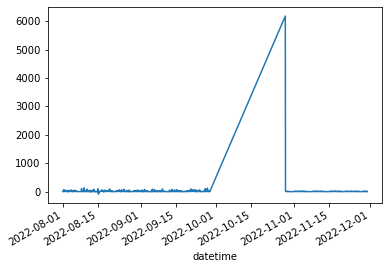

In [19]:
# df_cc_unico_cons.value.plot()